In [311]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [312]:
!pwd

/content


# Creating the data frame

In [313]:
price_df = pd.read_csv('/car_prices_yoy.csv')
price_df.nunique()

car_code             20702
car_manufacturer       106
car_model             6375
car_model_year          57
Year                    20
Price_YoY           101100
calendar_year           57
dtype: int64

In [314]:
#cluster_df = pd.read_csv('/scaled_cleaned_cluster.csv')

In [315]:
#cluster_df = cluster_df[["car_code", "cluster"]]
#cluster_df.nunique()

In [316]:
features_df = pd.read_csv('/scaled_cleaned.csv')

In [317]:
#features_df = pd.merge(features_df, cluster_df, on="car_code", how="inner")
#features_df.nunique()

## Merging features and prices

In [318]:
merged_df = pd.merge(price_df, features_df, left_on="car_code", right_on="car_code", how="right")
merged_df # [merged_df["calendar_year"] > 2023]["Price_YoY"].nunique()

,car_code,car_manufacturer,car_model,car_model_year,Year_x,Price_YoY,calendar_year,Propulsion_Combustion,Propulsion_Electric,Propulsion_Hybrid,...,Maximum power,Unit displacement,Trunk,USB connection,Gear speed transmissions,Urban,Year_y,Radio,Folding rear seat,Perimeter anti theft alarm
0,1,Lamborghini,Murcielago 6.2 V12,2002.0,19.0,0.817728,2021.0,1.0,0.0,0.0,...,0.302210,0.517060,0.003001,0.0,0.545455,0.002481,0.607143,0.0,0.0,0.0
1,1,Lamborghini,Murcielago 6.2 V12,2002.0,20.0,1.016211,2022.0,1.0,0.0,0.0,...,0.302210,0.517060,0.003001,0.0,0.545455,0.002481,0.607143,0.0,0.0,0.0
2,2,Fiat,Uno Mille Fire 1.0,2002.0,10.0,0.904178,2012.0,1.0,0.0,0.0,...,0.012707,0.249986,0.019006,0.0,0.454545,0.191067,0.607143,0.0,0.0,0.0
3,2,Fiat,Uno Mille Fire 1.0,2002.0,11.0,0.852240,2013.0,1.0,0.0,0.0,...,0.012707,0.249986,0.019006,0.0,0.454545,0.191067,0.607143,0.0,0.0,0.0
4,2,Fiat,Uno Mille Fire 1.0,2002.0,12.0,0.907692,2014.0,1.0,0.0,0.0,...,0.012707,0.249986,0.019006,0.0,0.454545,0.191067,0.607143,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108592,23884,Hyundai,HB20 Comfort 1.0 Turbo AT,2024.0,1.0,NaN,2025.0,1.0,0.0,0.0,...,0.048619,0.333321,0.019673,1.0,0.545455,0.148883,1.000000,1.0,1.0,1.0
108593,23885,Hyundai,HB20 Platinum 1.0 Turbo AT,2024.0,1.0,NaN,2025.0,1.0,0.0,0.0,...,0.048619,0.333321,0.019673,1.0,0.545455,0.148883,1.000000,1.0,1.0,1.0
108594,23893,Hyundai,HB20 Platinum Plus 1.0 Turbo AT,2024.0,1.0,NaN,2025.0,1.0,0.0,0.0,...,0.048619,0.333321,0.019673,1.0,0.545455,0.166253,1.000000,1.0,1.0,1.0
108595,23905,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,...,0.059669,0.546177,0.766589,1.0,0.545455,0.191067,0.982143,1.0,0.0,1.0


In [319]:
merged_df.rename(columns=lambda x: x.strip(), inplace=True)

### making model first name feature

In [320]:
merged_df[merged_df["car_code"] == 5152].sort_values(["car_code","Year_x"] )

,car_code,car_manufacturer,car_model,car_model_year,Year_x,Price_YoY,calendar_year,Propulsion_Combustion,Propulsion_Electric,Propulsion_Hybrid,...,Maximum power,Unit displacement,Trunk,USB connection,Gear speed transmissions,Urban,Year_y,Radio,Folding rear seat,Perimeter anti theft alarm
45833,5152,Volkswagen,Passat R-Line 2.0 TSi,2014.0,1.0,0.789727,2015.0,1.0,0.0,0.0,...,0.098895,0.496979,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0
45834,5152,Volkswagen,Passat R-Line 2.0 TSi,2014.0,2.0,0.933229,2016.0,1.0,0.0,0.0,...,0.098895,0.496979,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0
45835,5152,Volkswagen,Passat R-Line 2.0 TSi,2014.0,3.0,0.921536,2017.0,1.0,0.0,0.0,...,0.098895,0.496979,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0
45836,5152,Volkswagen,Passat R-Line 2.0 TSi,2014.0,4.0,0.953685,2018.0,1.0,0.0,0.0,...,0.098895,0.496979,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0
45837,5152,Volkswagen,Passat R-Line 2.0 TSi,2014.0,5.0,0.884420,2019.0,1.0,0.0,0.0,...,0.098895,0.496979,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0
45838,5152,Volkswagen,Passat R-Line 2.0 TSi,2014.0,6.0,0.918853,2020.0,1.0,0.0,0.0,...,0.098895,0.496979,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0
45839,5152,Volkswagen,Passat R-Line 2.0 TSi,2014.0,7.0,0.765800,2021.0,1.0,0.0,0.0,...,0.098895,0.496979,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0
45840,5152,Volkswagen,Passat R-Line 2.0 TSi,2014.0,8.0,1.027662,2022.0,1.0,0.0,0.0,...,0.098895,0.496979,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0
45841,5152,Volkswagen,Passat R-Line 2.0 TSi,2014.0,9.0,0.951438,2023.0,1.0,0.0,0.0,...,0.098895,0.496979,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0


## Selected features

In [321]:
merged_df.columns

Index(['car_code', 'car_manufacturer', 'car_model', 'car_model_year', 'Year_x',
       'Price_YoY', 'calendar_year', 'Propulsion_Combustion',
       'Propulsion_Electric', 'Propulsion_Hybrid',
       ...
       'Maximum power', 'Unit displacement', 'Trunk', 'USB connection',
       'Gear speed transmissions', 'Urban', 'Year_y', 'Radio',
       'Folding rear seat', 'Perimeter anti theft alarm'],
      dtype='object', length=107)

In [322]:
columns_to_correlate = [ 'car_model_year' , 'Year_x' , 'Price_YoY' ,
                          'calendar_year' , 'Acceleration' , 'Length' , 'Maximum torque' , 'Width' ,
                        'Compression ratio' , 'CNW Ranking' , 'Weight/Torque' , 'Guarantee' , 'Drag coefficient' , 'Height' , 'Valves per cylinder' ,
                        'Specific torque' , 'Minimum height from the ground' , 'Piston course' , 'Weight' , 'Price R' , 'Front gauge' , 'Weight/power' ,
                        'Displacement' , 'Max power regime.' , 'Turns diameter' , 'Cylinder diameter' , 'Rear gauge' , 'Length between the axis' , 'Maximum speed' ,
                        'Fuel tank' , 'Devaluation' , 'Road consumption' , 'Max torque regime' , 'Car payload' , 'Specific power' , 'CNW Index' , 'Reader score' ,
                        'Sidewall height' , 'Doors' , 'Maximum power' , 'Unit displacement' , 'Trunk' , 'Gear speed transmissions' , 'Urban' , 'Year_y' , 'car_model_small' , 'Next_Price_sd_scaled']

In [323]:
for column in merged_df.columns:
  if merged_df[column].nunique() > 2:
    #print(column)
    pass

<Axes: >

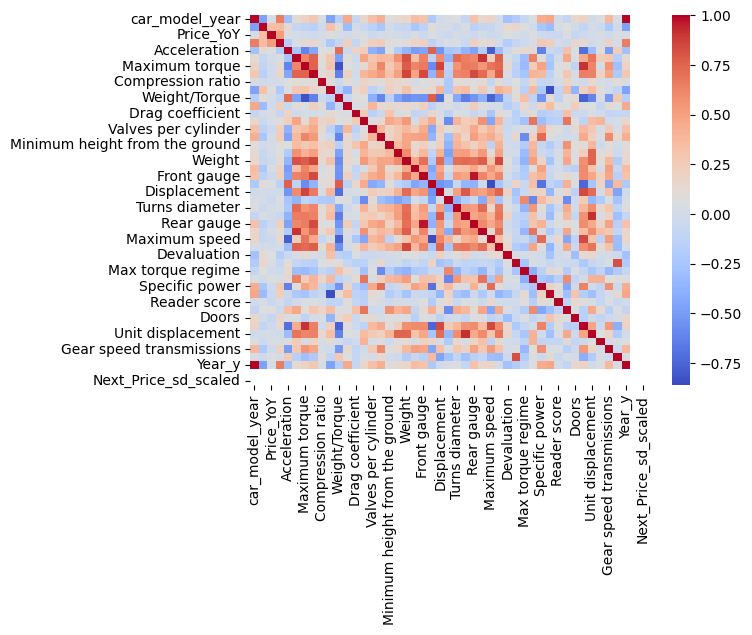

In [324]:
X_view = pd.DataFrame(merged_df, columns=columns_to_correlate)

X_view
sns.heatmap(pd.DataFrame(X_view).corr(), cmap='coolwarm')

In [325]:
columns_to_drop = ['Year_y',
'Price_YoY',
'Length between the axis',
'Weight',
'Maximum power',
'Displacement',
'Rear gauge',
'Front gauge',
'Unit displacement',
"Maximum torque",
"Weight/power",
"CNW Ranking",
"CNW Index",
"Maximum speed" #we keep acceleration only
]

In [326]:


corr_matrix = pd.DataFrame(X_view.drop(columns=columns_to_drop)).corr()
corr_matrix
melt = corr_matrix.melt(id_vars=corr_matrix.index.name, value_vars =corr_matrix.index.name )
melt = melt[melt["value"] > 0.75][melt["value"] < 1]
high_corr = melt.variable.unique()

high_corr_matrix = pd.DataFrame(X_view[high_corr]).corr()
high_corr_matrix

<ipython-input-326-0c3f657b22ae>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  melt = melt[melt["value"] > 0.75][melt["value"] < 1]


,Length,Width,Fuel tank,Road consumption,Urban
Length,1.000000,0.757523,0.761866,-0.089329,-0.164645
Width,0.757523,1.000000,0.769434,-0.158648,-0.213845
Fuel tank,0.761866,0.769434,1.000000,-0.189576,-0.318986
Road consumption,-0.089329,-0.158648,-0.189576,1.000000,0.823733
Urban,-0.164645,-0.213845,-0.318986,0.823733,1.000000


<Axes: >

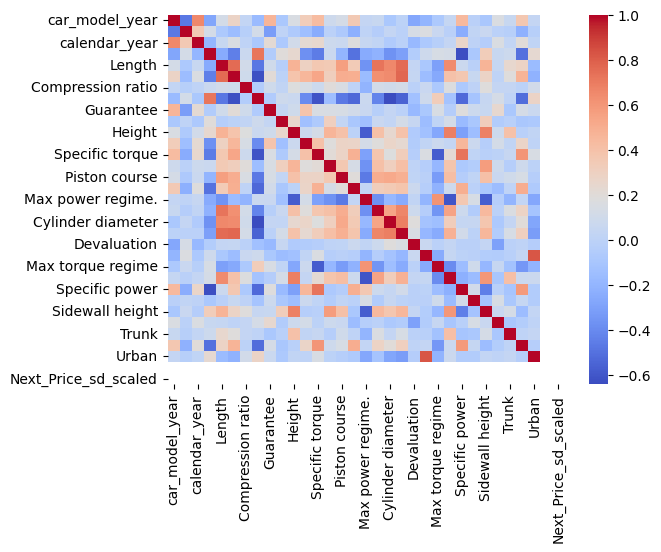

In [327]:
sns.heatmap(pd.DataFrame(X_view.drop(columns=columns_to_drop)).corr(), cmap='coolwarm')

# Model preprocessor

In [328]:
import numpy as np
from sklearn.model_selection import train_test_split

In [329]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

# Model X and y - train test validade sets

In [330]:
merged_df.nunique()

car_code                      20708
car_manufacturer                106
car_model                      6373
car_model_year                   57
Year_x                           20
                              ...  
Urban                           164
Year_y                           57
Radio                             2
Folding rear seat                 2
Perimeter anti theft alarm        2
Length: 107, dtype: int64

In [331]:
merged_df[merged_df["calendar_year"] == 2023 ] #Note : we take the last observation only years of 2024 and 2025 have no data

,car_code,car_manufacturer,car_model,car_model_year,Year_x,Price_YoY,calendar_year,Propulsion_Combustion,Propulsion_Electric,Propulsion_Hybrid,...,Maximum power,Unit displacement,Trunk,USB connection,Gear speed transmissions,Urban,Year_y,Radio,Folding rear seat,Perimeter anti theft alarm
2320,371,Volkswagen,Polo 1.6,2003.0,20.0,1.022858,2023.0,1.0,0.0,0.0,...,0.038122,0.399588,0.017673,0.0,0.454545,0.151365,0.625000,0.0,0.0,0.0
2333,372,Ford,Fiesta Supercharger 1.0,2003.0,20.0,1.052518,2023.0,1.0,0.0,0.0,...,0.034807,0.249986,0.020007,0.0,0.454545,0.141439,0.625000,0.0,0.0,0.0
2376,376,Audi,S3 1.8 Turbo Quattro,2003.0,20.0,1.095261,2023.0,1.0,0.0,0.0,...,0.106630,0.445773,0.017673,0.0,0.545455,0.106700,0.625000,0.0,0.0,0.0
2389,377,Alfa Romeo,156 2.5 V6,2003.0,20.0,0.990306,2023.0,1.0,0.0,0.0,...,0.087293,0.415652,0.024875,0.0,0.363636,0.101737,0.625000,0.0,0.0,0.0
2402,379,Volkswagen,Parati Tour 2.0,2003.0,20.0,0.936489,2023.0,1.0,0.0,0.0,...,0.044199,0.496979,0.028810,0.0,0.454545,0.106700,0.625000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108395,22700,Lexus,ES350 3.5 V6,2011.0,12.0,0.954673,2023.0,1.0,0.0,0.0,...,0.139227,0.577302,0.027609,0.0,0.545455,0.079404,0.767857,0.0,0.0,0.0
108396,22706,Ram,3500 Yellowstone Edition 6.7,2022.0,1.0,0.883727,2023.0,1.0,0.0,0.0,...,0.190608,0.000097,0.026542,1.0,0.545455,0.069479,0.964286,1.0,1.0,1.0
108513,23313,GMC,Hummer EV Edition 1,2022.0,1.0,1.105359,2023.0,0.0,1.0,0.0,...,0.055249,0.487943,0.026542,1.0,0.090909,0.131514,0.964286,1.0,1.0,1.0
108548,23661,McLaren,765LT Spider 4.0 V8,2022.0,1.0,0.926604,2023.0,1.0,0.0,0.0,...,0.404972,0.499991,0.009670,1.0,0.636364,0.037221,0.964286,1.0,0.0,1.0


In [332]:
X = merged_df[merged_df["calendar_year"] <= 2023 ][merged_df["Price_YoY"] > 0 ]  .drop( columns=['car_code' , 'car_model_year' ]) #, 'cluster'
X.columns
columns_to_drop

<ipython-input-332-7c844bdc0e7e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = merged_df[merged_df["calendar_year"] <= 2023 ][merged_df["Price_YoY"] > 0 ]  .drop( columns=['car_code' , 'car_model_year' ]) #, 'cluster'


['Year_y',
 'Price_YoY',
 'Length between the axis',
 'Weight',
 'Maximum power',
 'Displacement',
 'Rear gauge',
 'Front gauge',
 'Unit displacement',
 'Maximum torque',
 'Weight/power',
 'CNW Ranking',
 'CNW Index',
 'Maximum speed']

In [333]:
X = X.drop(columns=columns_to_drop )



In [334]:
X.shape

(104048, 91)

In [335]:

num_feat = [feature for feature in X.select_dtypes(include='number').columns.tolist() if feature not in ["Year_x", "calendar_year" , "car_code", "car_model_year" , "CNW Index", "CNW Ranking", "CNW Ranking", "Devaluation" ] ]
#num_feat
categorical_features = list(merged_df.select_dtypes(include='object').columns)
categorical_features = [] # intentionaly removing these features ['car_manufacturer', 'car_model_small']
year_features = ["Year_x" , "calendar_year" ]  #


In [336]:
#reiviewd after permutation analysis --> see heredown
num_feat = ['Price R',
#'Price_YoY', , #This is our target!
'Car gearbox_Manual',
'Length',
'Settings_Pickup truck',
'Width',
'Sidewall height',
'Car payload',
'Height',
'Doors',
'Acceleration',
'Trunk',
'Specific power',
'Cylinder diameter',
'Fuel tank',
'Weight/Torque',
'Specific torque',
'Max torque regime',
'Piston course',
'Fuel_Gasoline',
'Provenance'
]

In [337]:

# Impute then scale numerical values:
num_inputer = Pipeline([
    ('imputer', SimpleImputer(strategy="mean"))
    #('standard_scaler', StandardScaler())
])

standard_scaler = Pipeline([
    #('imputer', SimpleImputer(strategy="mean"))
    ('standard_scaler', StandardScaler())
])




# Encode categorical values
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)




# Parallelize "num_transformer" and "cat_transfomer"
preprocessor = ColumnTransformer([
    ('cat_transformer', cat_transformer, categorical_features ), #,
    ('standard_scaler', standard_scaler, year_features ) ,
    ('num_inputer', num_inputer, num_feat  )  #numerical_columns
])


In [338]:
y = merged_df[merged_df["calendar_year"] <= 2023 ][merged_df["Price_YoY"] > 0 ] ['Price_YoY'] #[merged_df["cluster"] == 0 ]
y = y.fillna(0)
y

<ipython-input-338-59ad72174b8b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = merged_df[merged_df["calendar_year"] <= 2023 ][merged_df["Price_YoY"] > 0 ] ['Price_YoY'] #[merged_df["cluster"] == 0 ]


0         0.817728
1         1.016211
2         0.904178
3         0.852240
4         0.907692
            ...   
108395    0.954673
108396    0.883727
108513    1.105359
108548    0.926604
108549    0.896931
Name: Price_YoY, Length: 104048, dtype: float64

In [339]:
from sklearn.model_selection import train_test_split

X = preprocessor.fit_transform(X)  #keep in mind, is not procedural good

# Split data into train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42  # TEST = 30%
)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size = 0.5, random_state = 42  # TEST = 15%
)

#  XG Boost Model

In [340]:
from xgboost import XGBRegressor

In [341]:

#X_train_transformed = preprocessor.fit_transform(X_train)
#X_val_transformed = preprocessor.transform(X_val)
X.shape

(104048, 22)

In [342]:
X_train.shape
#X_train.shape

(72833, 22)

In [343]:
X_val.shape
#X_val.shape

(15608, 22)

In [344]:
preprocessor.get_feature_names_out()


array(['standard_scaler__Year_x', 'standard_scaler__calendar_year',
       'num_inputer__Price R', 'num_inputer__Car gearbox_Manual',
       'num_inputer__Length', 'num_inputer__Settings_Pickup truck',
       'num_inputer__Width', 'num_inputer__Sidewall height',
       'num_inputer__Car payload', 'num_inputer__Height',
       'num_inputer__Doors', 'num_inputer__Acceleration',
       'num_inputer__Trunk', 'num_inputer__Specific power',
       'num_inputer__Cylinder diameter', 'num_inputer__Fuel tank',
       'num_inputer__Weight/Torque', 'num_inputer__Specific torque',
       'num_inputer__Max torque regime', 'num_inputer__Piston course',
       'num_inputer__Fuel_Gasoline', 'num_inputer__Provenance'],
      dtype=object)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


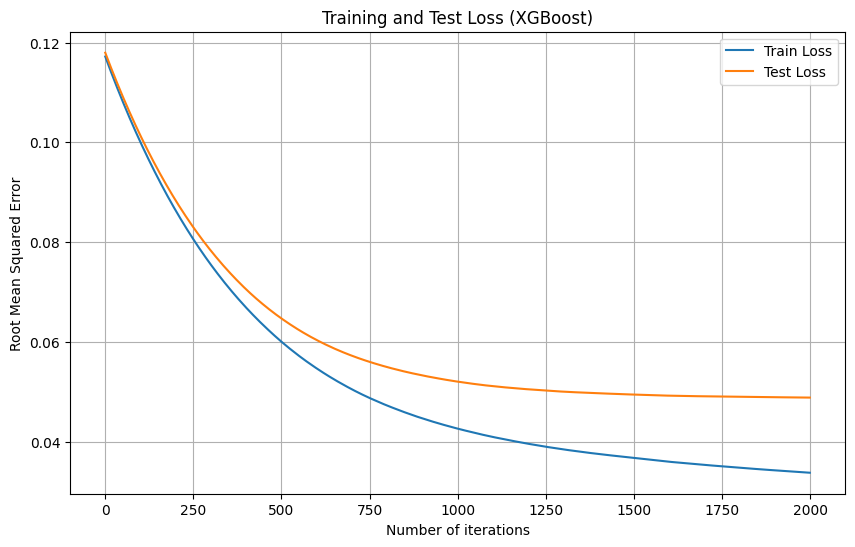

In [345]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have your X_train, y_train, X_test, and y_test data prepared

# Define the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(max_depth=12,  learning_rate=0.002 , n_estimators=2000 ) #  n_estimators=150 , scale_pos_weight = 1
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the model with evaluation set
xgb_regressor.fit(X_train, y_train, eval_set=eval_set, eval_metric="rmse", verbose=False) #set verbose=True if you want to show al the results


# Extract training and validation loss from the model's history
results = xgb_regressor.evals_result()
train_loss = results['validation_0']['rmse']
test_loss = results['validation_1']['rmse']

# Plot the train and test loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Number of iterations')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Test Loss (XGBoost)')
plt.legend()
plt.grid()
plt.show()

In [346]:
from sklearn.metrics import mean_squared_error

In [347]:
y_pred = xgb_regressor.predict(X_test)
#y_pred = model.predict(X_test)
y_pred

array([0.9827785 , 0.8995768 , 0.8897646 , ..., 1.1394436 , 0.7879018 ,
       0.86927736], dtype=float32)

<Axes: >

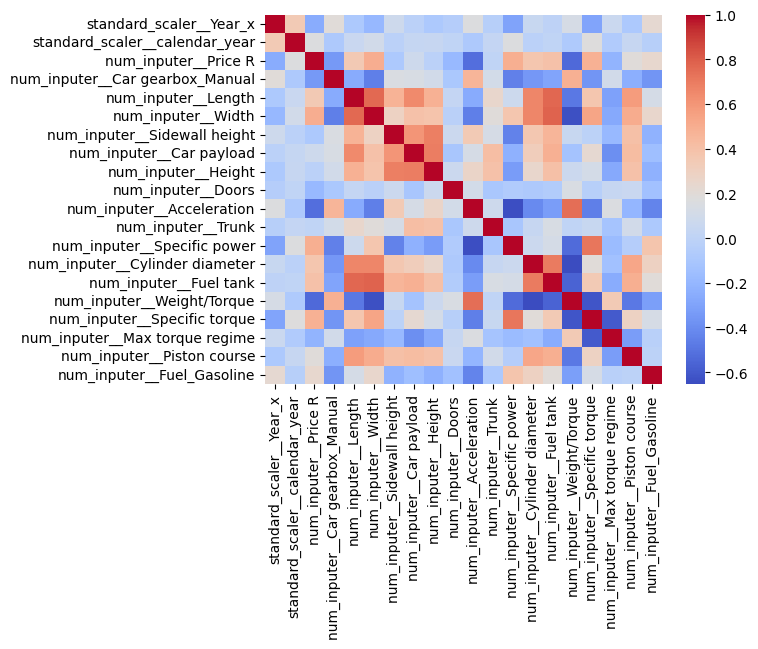

In [348]:
X_view = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())
X_view.drop(labels="num_inputer__Provenance", axis=1, inplace=True)
X_view.drop(labels="num_inputer__Settings_Pickup truck", axis=1, inplace=True)

X_view
sns.heatmap(pd.DataFrame(X_view).corr(), cmap='coolwarm')

## comparing model with naive model

In [349]:
from sklearn.metrics import mean_squared_error

In [350]:
y_pred = xgb_regressor.predict(X_test)
#y_pred = model.predict(X_test)
y_pred

array([0.9827785 , 0.8995768 , 0.8897646 , ..., 1.1394436 , 0.7879018 ,
       0.86927736], dtype=float32)

In [351]:
mean_squared_error(y_test, y_pred) ** (0.5)   #model score: mean square error --> lower is better

0.04881785547097161

In [352]:
mean_squared_error(y_test, [y_test.mean()]*len(y_test)) ** (0.5)   #naive score: mean square error

0.11814408140946246

In [353]:
y_test.mean()

0.9346343800567612

## Visualizing the errors

<Axes: xlabel='Price_YoY', ylabel='Count'>

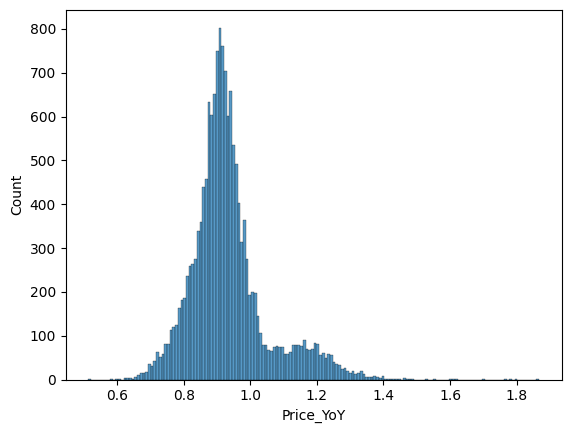

In [354]:
sns.histplot(y_test)

<Axes: ylabel='Count'>

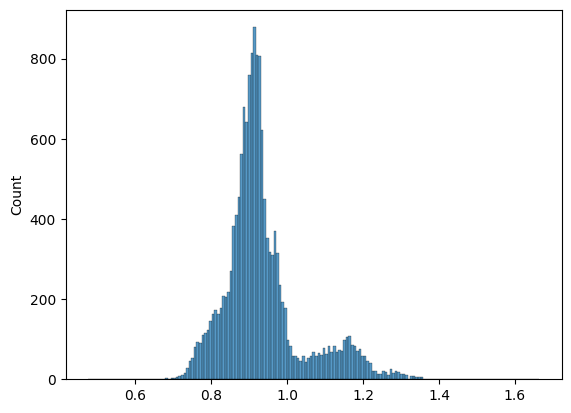

In [355]:
sns.histplot(y_pred)

In [356]:
X_view = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())


In [357]:
X_view["y_pred"] = (y_pred)

In [358]:
X_view["y_test"] = y_test.reset_index()["Price_YoY"]

In [359]:
X_view["y_pred_error"] = X_view["y_test"] - X_view["y_pred"]

<Axes: xlabel='y_pred_error', ylabel='Count'>

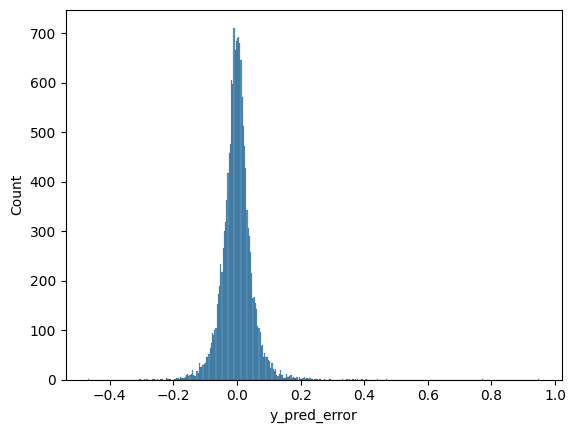

In [360]:
sns.histplot(X_view["y_pred_error"])

<Axes: xlabel='standard_scaler__Year_x', ylabel='y_pred_error'>

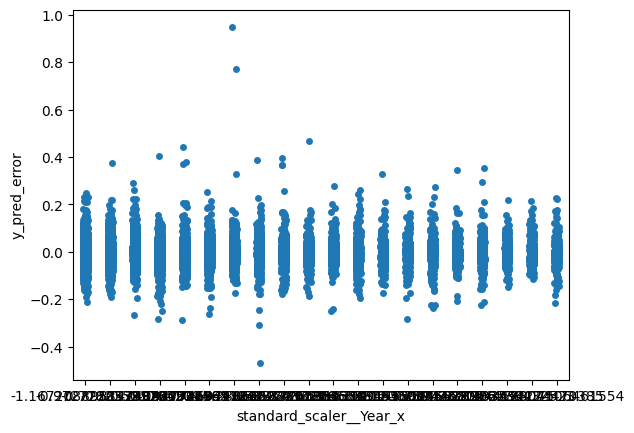

In [361]:
sns.stripplot(data=X_view, x="standard_scaler__Year_x", y="y_pred_error")

In [362]:
X_view.columns #["standard_scaler__Year_x"].nunique()

Index(['standard_scaler__Year_x', 'standard_scaler__calendar_year',
       'num_inputer__Price R', 'num_inputer__Car gearbox_Manual',
       'num_inputer__Length', 'num_inputer__Settings_Pickup truck',
       'num_inputer__Width', 'num_inputer__Sidewall height',
       'num_inputer__Car payload', 'num_inputer__Height', 'num_inputer__Doors',
       'num_inputer__Acceleration', 'num_inputer__Trunk',
       'num_inputer__Specific power', 'num_inputer__Cylinder diameter',
       'num_inputer__Fuel tank', 'num_inputer__Weight/Torque',
       'num_inputer__Specific torque', 'num_inputer__Max torque regime',
       'num_inputer__Piston course', 'num_inputer__Fuel_Gasoline',
       'num_inputer__Provenance', 'y_pred', 'y_test', 'y_pred_error'],
      dtype='object')

## Saving the model for later usage

In [365]:
import pickle

filename = 'xgb_reg_model_V2c_simple.sav'
pickle.dump(xgb_regressor, open(filename, 'wb'))


#xgb_reg.save('xgb.h5')

In [366]:
filename = 'xgb_reg_preprocessor_simple.sav'
pickle.dump(preprocessor, open(filename, 'wb'))

# Simple tester

In [302]:
car = merged_df[merged_df["calendar_year"] == 2023]
car = car[car["car_manufacturer"]  == "Peugeot"]
car = merged_df[merged_df.index == 108262 ]
#car["Year_x"] = 2
#car["calendar_year"] = 20
#car["Price_YoY"] = np.nan
#car["Next_YoY_Price"] = np.nan
#car["prev_1_Price_YoY"] = 1.046803
#car["prev_2_Price_YoY"] =  0.949971

#car[["car_code", "car_manufacturer", "car_model_small", "Next_YoY_Price" ]]
car

,car_code,car_manufacturer,car_model,car_model_year,Year_x,Price_YoY,calendar_year,Propulsion_Combustion,Propulsion_Electric,Propulsion_Hybrid,...,Maximum power,Unit displacement,Trunk,USB connection,Gear speed transmissions,Urban,Year_y,Radio,Folding rear seat,Perimeter anti theft alarm
108262,22458,Peugeot,3008 Griffe 1.6,2018.0,5.0,0.946044,2023.0,1.0,0.0,0.0,...,0.073481,0.400592,0.034345,1.0,0.545455,0.17866,0.892857,1.0,1.0,1.0


In [303]:
car = car.drop( columns=['car_code' , 'car_model_year',  'Price_YoY' ])
car

,car_manufacturer,car_model,Year_x,calendar_year,Propulsion_Combustion,Propulsion_Electric,Propulsion_Hybrid,Propulsion_Light Hybrid,Propulsion_Plug-in hybrid,Car gearbox_Automated,...,Maximum power,Unit displacement,Trunk,USB connection,Gear speed transmissions,Urban,Year_y,Radio,Folding rear seat,Perimeter anti theft alarm
108262,Peugeot,3008 Griffe 1.6,5.0,2023.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.073481,0.400592,0.034345,1.0,0.545455,0.17866,0.892857,1.0,1.0,1.0


In [304]:
car_transformed = preprocessor.transform(car)

In [305]:
preprocessor.get_feature_names_out()

array(['standard_scaler__Year_x', 'standard_scaler__calendar_year',
       'num_inputer__Price R', 'num_inputer__Car gearbox_Manual',
       'num_inputer__Length', 'num_inputer__Settings_Pickup truck',
       'num_inputer__Width', 'num_inputer__Sidewall height',
       'num_inputer__Car payload', 'num_inputer__Height',
       'num_inputer__Doors', 'num_inputer__Acceleration',
       'num_inputer__Trunk', 'num_inputer__Specific power',
       'num_inputer__Cylinder diameter', 'num_inputer__Fuel tank',
       'num_inputer__Weight/Torque', 'num_inputer__Specific torque',
       'num_inputer__Max torque regime', 'num_inputer__Piston course',
       'num_inputer__Fuel_Gasoline', 'num_inputer__Provenance'],
      dtype=object)

In [306]:
xgb_regressor.predict(car_transformed)

array([0.9089618], dtype=float32)

# Create Unique dataframe

*The unique dataframe must have:
- car code
- car manufacturer
- car model
- car model year
- expected price devaluation
- car code

In [367]:
xgb_regressor  = pickle.load(open("/content/xgb_reg_model_V2c_simple.sav", 'rb'))

preprocessor =  pickle.load(open("/content/xgb_reg_preprocessor_simple.sav", 'rb'))

In [368]:

car_features_df = pd.read_csv('/scaled_cleaned.csv')
car_prices_yoy = pd.read_csv("/car_prices_yoy.csv")
car_model_and_years = car_prices_yoy[["car_code", "car_model", "car_manufacturer" , "car_model_year" ]].drop_duplicates()
car_model_and_years

merged_car_price_yoy = car_features_df.merge(car_model_and_years, left_on="car_code", right_on="car_code", how="left")

cars_to_tranform_bis  = merged_car_price_yoy.copy()#.drop( columns=["car_code", "car_model_year" ])#  , "car_model_year"  .rename(columns={"Year": "Year_x"})

cars_to_tranform_bis["Year_x"] = 2024 -  cars_to_tranform_bis["car_model_year"]

cars_to_tranform_bis["calendar_year"] = 2019   #we consider we are in 2019  to avoid over pricing

cars_to_tranform_bis = cars_to_tranform_bis.drop( columns=["car_code", "car_model_year", "Year" ])

car_prices_yoy_transformed = preprocessor.transform(cars_to_tranform_bis)

cars_price_pred =   xgb_regressor.predict(car_prices_yoy_transformed)
merged_car_price_yoy["price_pred"] = cars_price_pred


In [369]:
merged_car_price_yoy#.to_csv("car_features_pr_pred_bis2.csv", index=False)

,car_code,Propulsion_Combustion,Propulsion_Electric,Propulsion_Hybrid,Propulsion_Light Hybrid,Propulsion_Plug-in hybrid,Car gearbox_Automated,Car gearbox_Automatic,Car gearbox_CVT,Car gearbox_Manual,...,Gear speed transmissions,Urban,Year,Radio,Folding rear seat,Perimeter anti theft alarm,car_model,car_manufacturer,car_model_year,price_pred
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.545455,0.002481,0.607143,0.0,0.0,0.0,Murcielago 6.2 V12,Lamborghini,2002.0,0.962647
1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.454545,0.191067,0.607143,0.0,0.0,0.0,Uno Mille Fire 1.0,Fiat,2002.0,0.936179
2,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.454545,0.121588,0.607143,0.0,0.0,0.0,Astra Sport 2.0,Chevrolet,2002.0,0.923502
3,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.454545,0.111663,0.607143,0.0,0.0,0.0,Golf GTi 1.8 Turbo,Volkswagen,2002.0,0.935403
4,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.454545,0.166253,0.607143,0.0,0.0,0.0,Brava HGT 1.8 16V,Fiat,2002.0,0.918452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20703,23884,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.545455,0.148883,1.000000,1.0,1.0,1.0,HB20 Comfort 1.0 Turbo AT,Hyundai,2024.0,0.830669
20704,23885,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.545455,0.148883,1.000000,1.0,1.0,1.0,HB20 Platinum 1.0 Turbo AT,Hyundai,2024.0,0.831442
20705,23893,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.545455,0.166253,1.000000,1.0,1.0,1.0,HB20 Platinum Plus 1.0 Turbo AT,Hyundai,2024.0,0.834986
20706,23905,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.545455,0.191067,0.982143,1.0,0.0,1.0,NaN,NaN,NaN,0.960928
